# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# Import Libraries and load dataset

In [10]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

num_bins = 10

In [11]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv('pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

In [12]:
pima_df.head(10)
#0s signify a lot of missing values

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Print the datatypes of each column and the shape of the dataset

In [13]:
pima_df.shape

(768, 9)

In [14]:
pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

Replace all the 0s in the column with the median of the same column value accordingly.

In [15]:
pima_df.loc[pima_df.Plas == 0, 'Plas'] = pima_df.Plas.median()
pima_df.loc[pima_df.Pres == 0, 'Pres'] = pima_df.Pres.median()
pima_df.loc[pima_df.skin == 0, 'skin'] = pima_df.skin.median()
pima_df.loc[pima_df.test == 0, 'test'] = pima_df.test.median()
pima_df.loc[pima_df.mass == 0, 'mass'] = pima_df.mass.median()

Descriptive statistics:

In [16]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Distribution of 'Class' variable

In [17]:
pima_df.groupby("class").agg({'class': 'count'})

,class
class,
0,500
1,268


# Pairplots and Correlation method to observe the relationship between different variables
Hint: Use seaborn plot and check the relationship between different variables

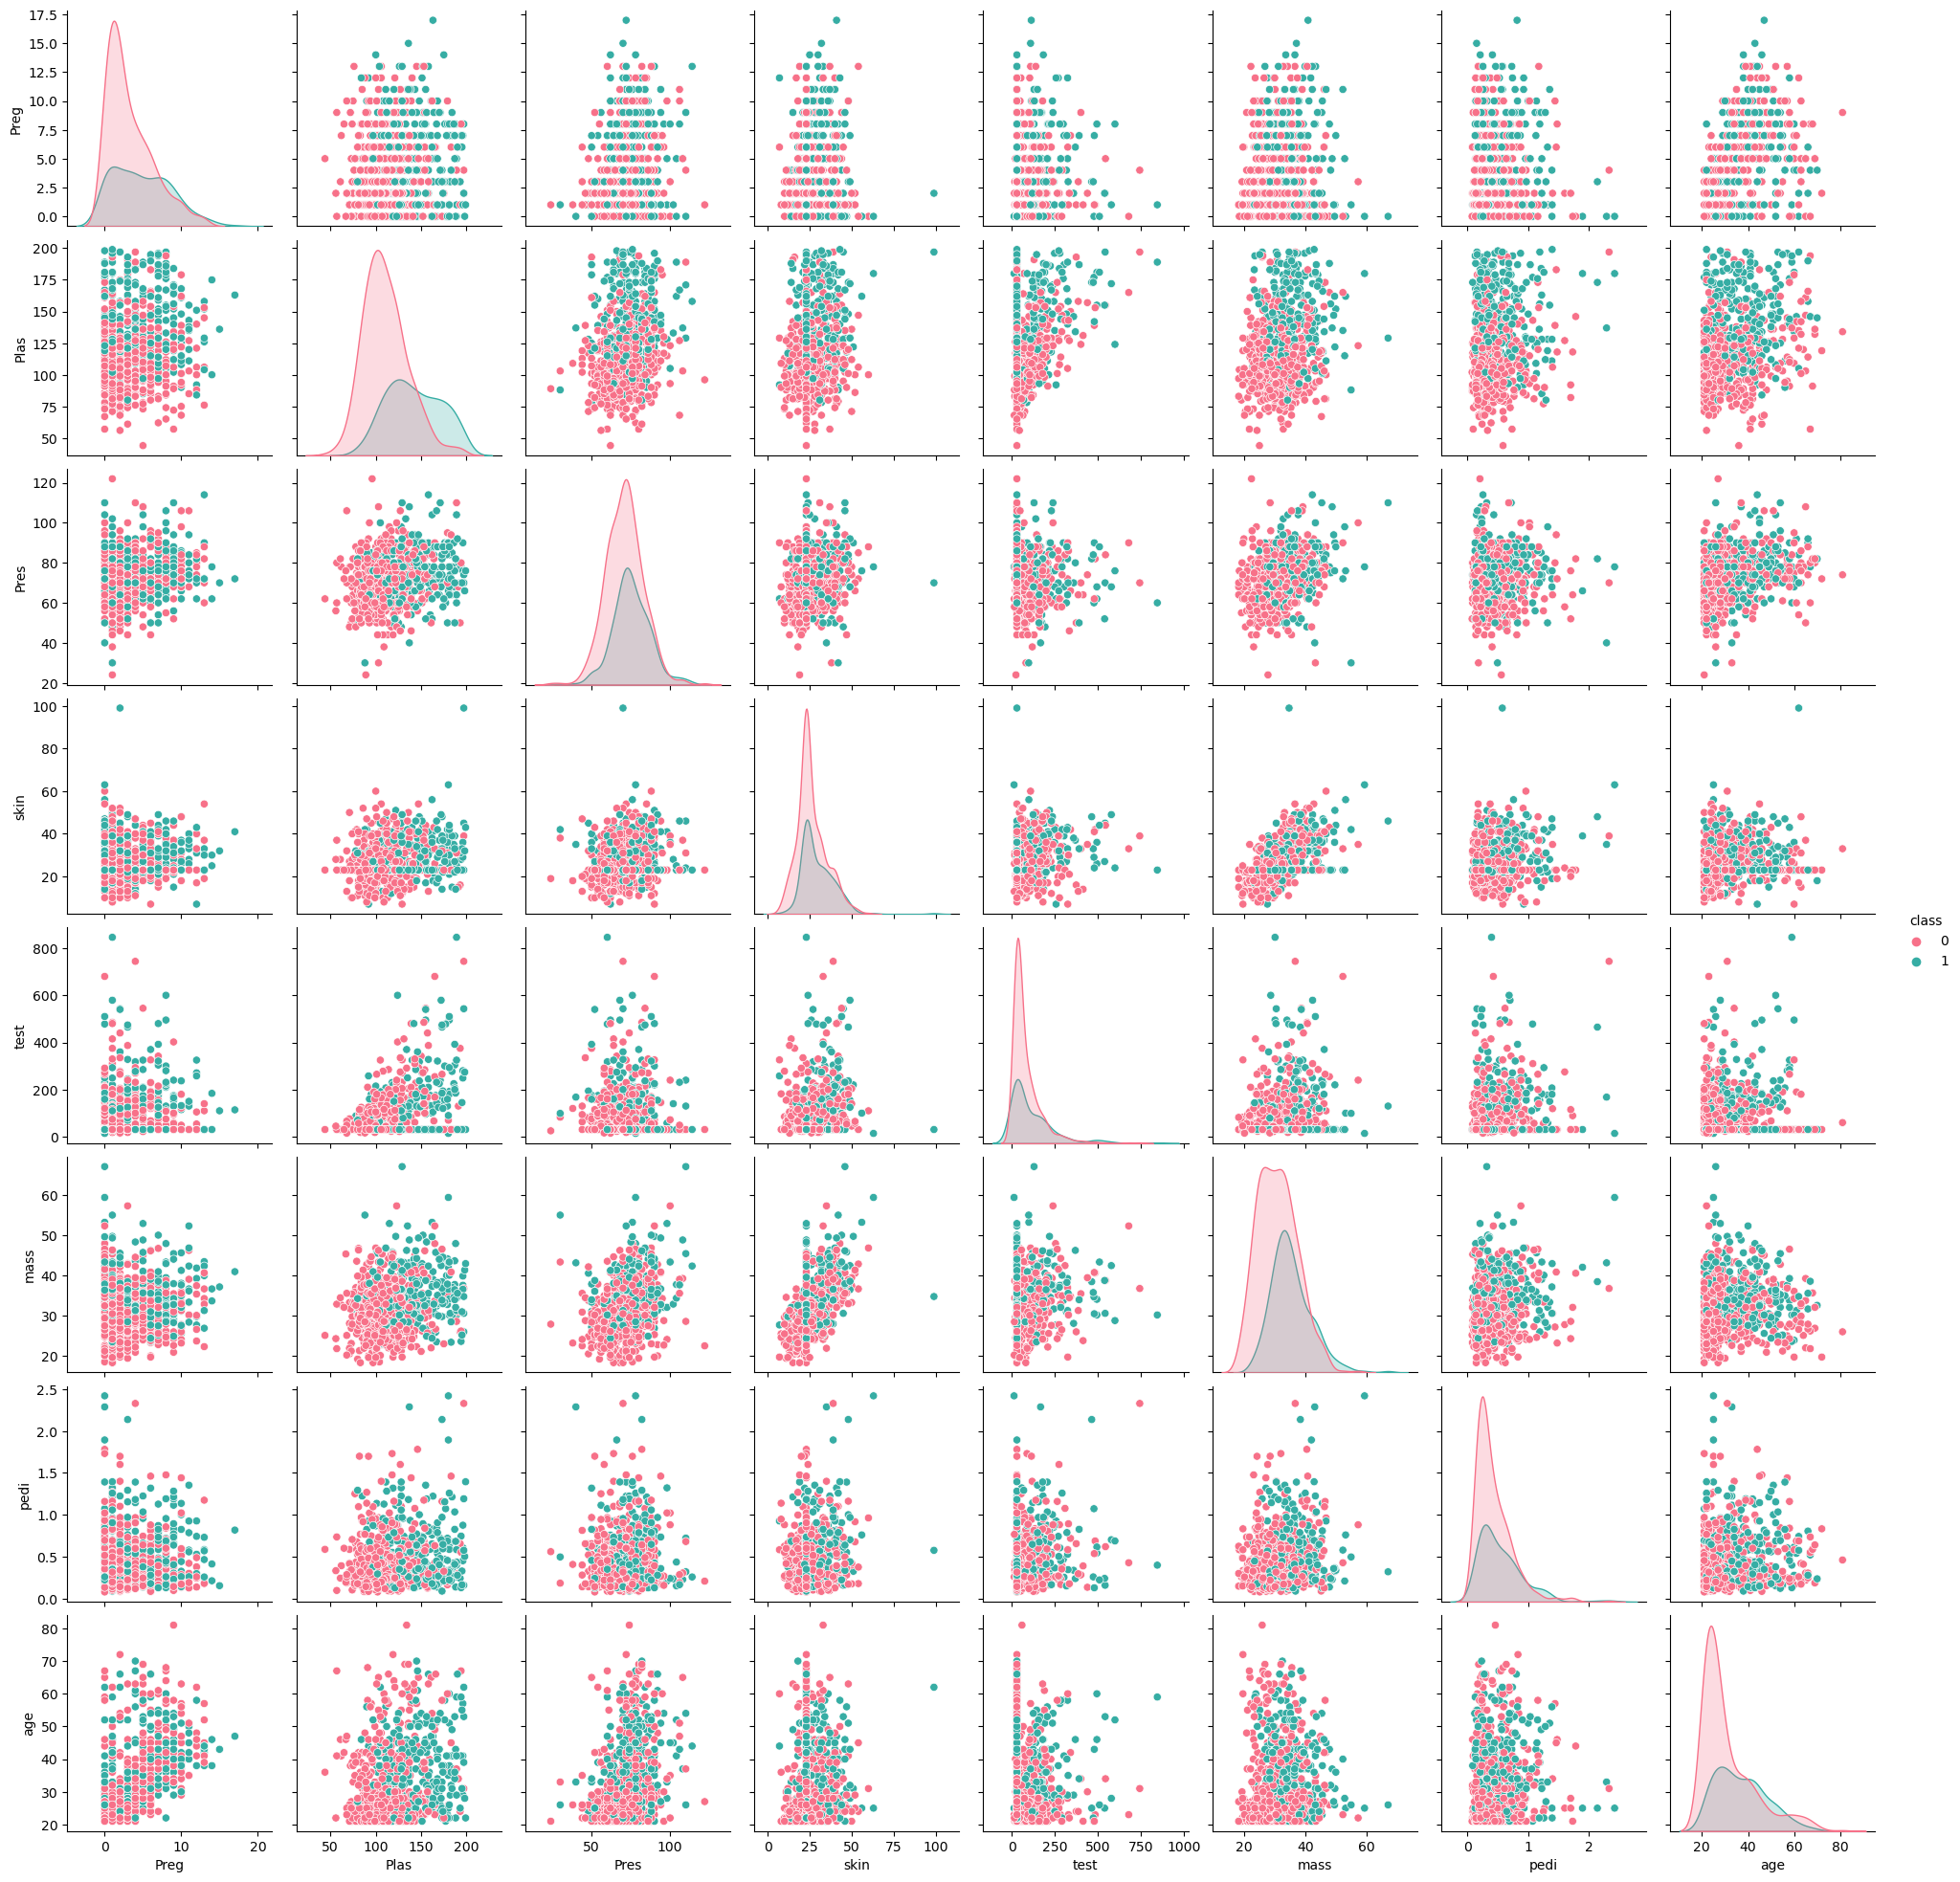

In [18]:
import seaborn as sns
sns.pairplot(pima_df, hue="class", palette="husl")

In [19]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Check for correlation between variables whose values are >0.8

Observations:

Diagonal plots have already been discussed in the Observations I of Univariate Analysis.
There are no linear relationships between any two variables.
There is no strong correlation between any two variables.
There is no strong correlation between any independent variable and class variable.

Using the plot - infer the relationship between different variables

# Split the pima_df into training and test set

In [20]:
# splitting data into training and test set for independent attributes
n=pima_df['class'].count()
train_set = pima_df.head(int(round(n*0.7))) # Up to the last initial training set row
test_set = pima_df.tail(int(round(n*0.3))) # Past the last initial training set row

# capture the target column ("class") into separate vectors for training set and test set
train_labels = train_set.pop("class")
test_labels = test_set.pop("class")

# Decision tree model using “entropy”

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Model Evaluation

In [26]:
print(dt_model.score(train_set,train_labels))
test_pred = dt_model.predict(test_set)
print(dt_model.score(test_set,test_labels))

0.7546468401486989
0.7478260869565218


In [27]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns)) #Print the feature importance of the decision model

           Imp
Preg  0.000000
Plas  0.624808
Pres  0.000000
skin  0.000000
test  0.028969
mass  0.258560
pedi  0.039628
age   0.048035


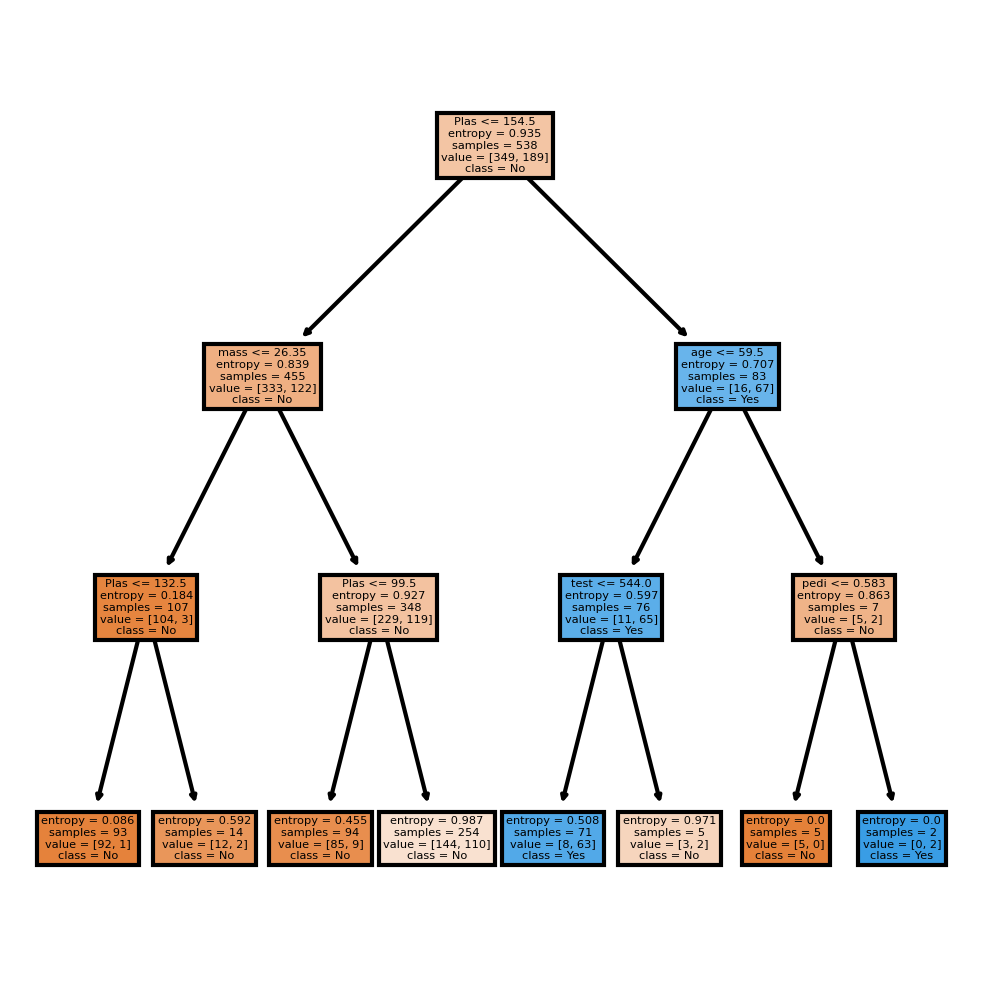

In [28]:
# Plotting the tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(train_set)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dt_modeldt_model, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

0.7478260869565218


<AxesSubplot:>

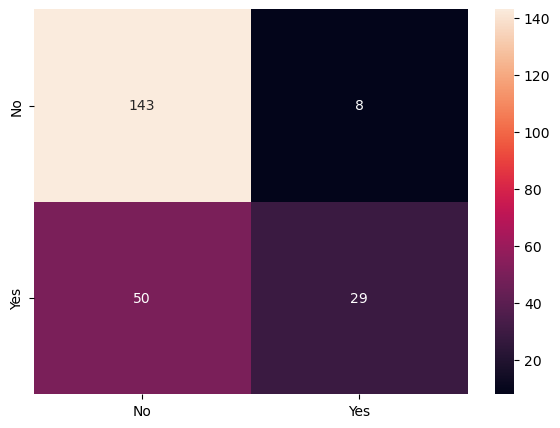

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dt_model.score(test_set , test_labels))
y_predict = dt_model.predict(test_set)

cm = confusion_matrix(test_labels, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [30]:
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(test_labels, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.78      0.37      0.50        79
           0       0.74      0.95      0.83       151

    accuracy                           0.75       230
   macro avg       0.76      0.66      0.67       230
weighted avg       0.76      0.75      0.72       230

